#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

To explore numeric data, you would use techniques like histograms and box plots to visualize the distribution, central tendency, and outliers, complemented by summary statistics such as mean, median, and standard deviation. For categorical data, the focus shifts to understanding frequencies and proportions, which are best examined using bar charts, count plots, and generating value counts for each category. To investigate the relationship between categorical and numeric data, you can use grouped visualizations like box plots or violin plots to compare the distribution of the numeric variable across each category, and you can also group the data by the categorical feature to calculate aggregate statistics (e.g., the average of the numeric column for each category).

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [1]:
# Import necessary libraries
# pandas is for data manipulation and analysis
import pandas as pd
# numpy is for numerical operations, we'll use it to create fake data
import numpy as np
# matplotlib and seaborn are for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots for a nicer look
sns.set_style("whitegrid")

print("Cell 1 executed: Libraries imported and style set.")


Cell 1 executed: Libraries imported and style set.


In [2]:
# Set a seed for reproducibility. This ensures we get the same random data every time.
np.random.seed(42)

# Number of rows for our dataset
num_rows = 1000

# Create a categorical column with 10 distinct categories
categories = [f'Category_{chr(65+i)}' for i in range(10)] # Creates ['Category_A', 'Category_B', ...]
categorical_data = np.random.choice(categories, size=num_rows)

# Create two numeric columns with some random patterns
# Numeric_1 will be normally distributed
numeric_1 = np.random.normal(loc=100, scale=25, size=num_rows)

# Numeric_2 will have some relationship with the categorical data
# We'll create a base value for each category and add some random noise
category_bases = {cat: 50 + i*15 for i, cat in enumerate(categories)}
numeric_2 = [category_bases[cat] + np.random.normal(loc=0, scale=10) for cat in categorical_data]

# Combine the data into a pandas DataFrame
df = pd.DataFrame({
    'Product_Category': categorical_data,
    'Sales_Amount': numeric_1,
    'Customer_Rating': numeric_2
})

# Display the first 5 rows of the dataframe
print("Cell 2 executed: Data generated successfully. Here are the first 5 rows:")
print(df.head())


Cell 2 executed: Data generated successfully. Here are the first 5 rows:
  Product_Category  Sales_Amount  Customer_Rating
0       Category_G    121.696226       156.326525
1       Category_D     76.587150        92.390877
2       Category_H     78.111874       164.444910
3       Category_E    105.115255       103.107709
4       Category_G     84.933805       136.975332


--- Exploring the Categorical column: 'Product_Category' ---

Frequency of each category:
Product_Category
Category_A    118
Category_C    110
Category_J    107
Category_E    107
Category_H    100
Category_F     96
Category_D     94
Category_G     94
Category_I     91
Category_B     83
Name: count, dtype: int64


/tmp/ipykernel_3150/4128853757.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category', data=df, order=category_counts.index, palette='viridis')


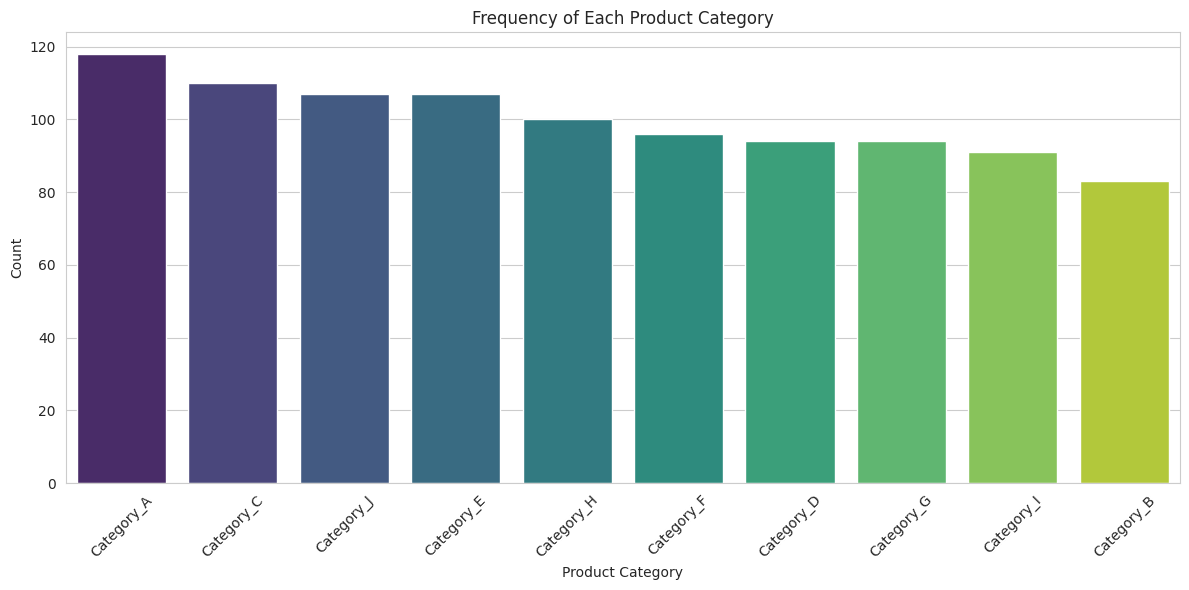


Cell 3 executed: Categorical data explored.


In [3]:
print("--- Exploring the Categorical column: 'Product_Category' ---")

# Get frequency counts of each category
category_counts = df['Product_Category'].value_counts()
print("\nFrequency of each category:")
print(category_counts)

# Create a bar chart to visualize the frequency
plt.figure(figsize=(12, 6))
sns.countplot(x='Product_Category', data=df, order=category_counts.index, palette='viridis')
plt.title('Frequency of Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\nCell 3 executed: Categorical data explored.")




--- Exploring the Numeric columns: 'Sales_Amount' and 'Customer_Rating' ---

Summary statistics for numeric columns:
       Sales_Amount  Customer_Rating
count   1000.000000      1000.000000
mean     100.261105       117.438323
std       25.605186        45.277863
min       10.794868        24.765125
25%       83.785512        79.420457
50%      100.683990       116.425163
75%      118.256083       156.054235
max      178.549174       210.436679


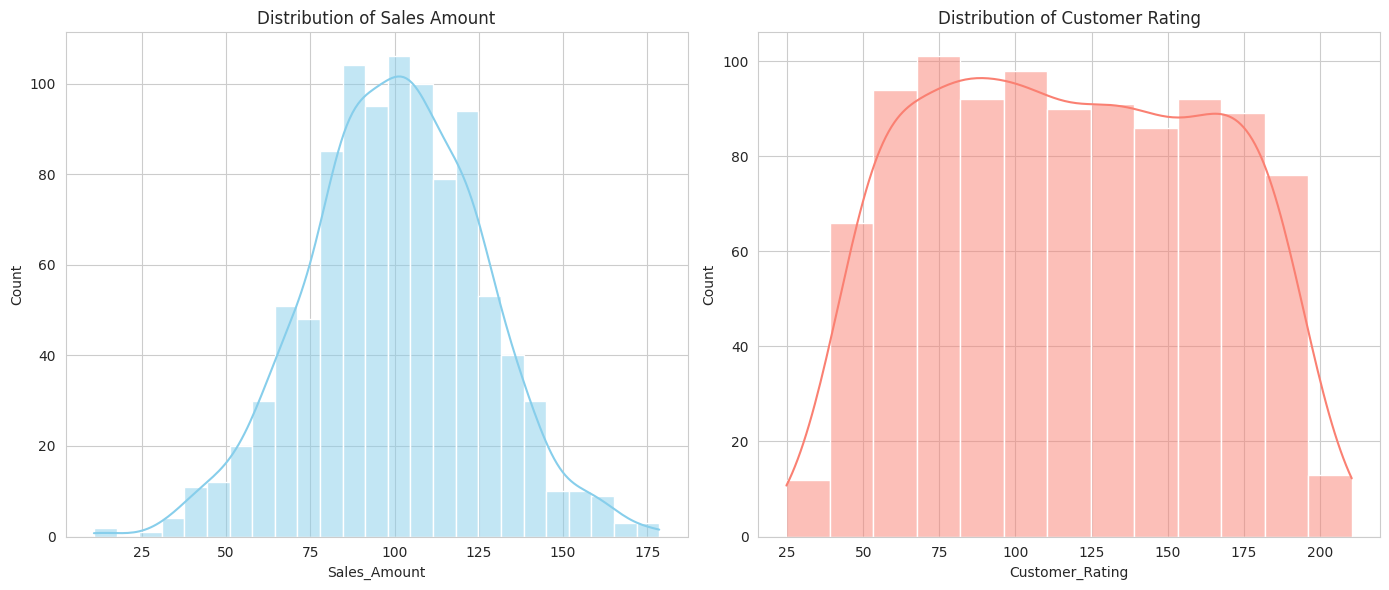

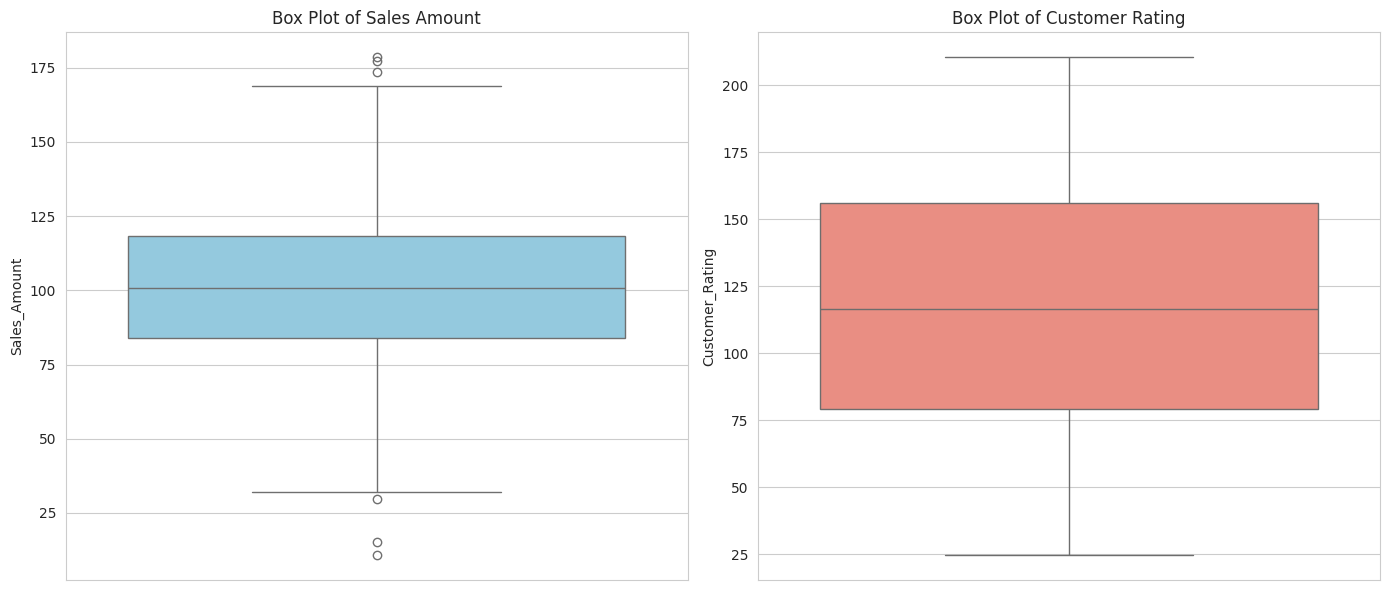


Cell 4 executed: Numeric data explored.


In [4]:
print("\n--- Exploring the Numeric columns: 'Sales_Amount' and 'Customer_Rating' ---")

# Get summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Create histograms to see the distribution of each numeric column
plt.figure(figsize=(14, 6))

# Histogram for Sales_Amount
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['Sales_Amount'], kde=True, color='skyblue')
plt.title('Distribution of Sales Amount')

# Histogram for Customer_Rating
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df['Customer_Rating'], kde=True, color='salmon')
plt.title('Distribution of Customer Rating')

plt.tight_layout()
plt.show()

# Create box plots to identify outliers and see the spread
plt.figure(figsize=(14, 6))

# Box plot for Sales_Amount
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Sales_Amount'], color='skyblue')
plt.title('Box Plot of Sales Amount')

# Box plot for Customer_Rating
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Customer_Rating'], color='salmon')
plt.title('Box Plot of Customer Rating')

plt.tight_layout()
plt.show()
print("\nCell 4 executed: Numeric data explored.")



--- Exploring the relationship between categorical and numeric data ---

Average Sales Amount per Product Category:
Product_Category
Category_I     94.962206
Category_H     97.832626
Category_J     97.951703
Category_A     99.427008
Category_D     99.673680
Category_E    100.620633
Category_G    100.785498
Category_F    102.469147
Category_C    103.547804
Category_B    105.857773
Name: Sales_Amount, dtype: float64


/tmp/ipykernel_3150/4185662768.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Product_Category', y='Customer_Rating', data=df, order=categories, palette='plasma')


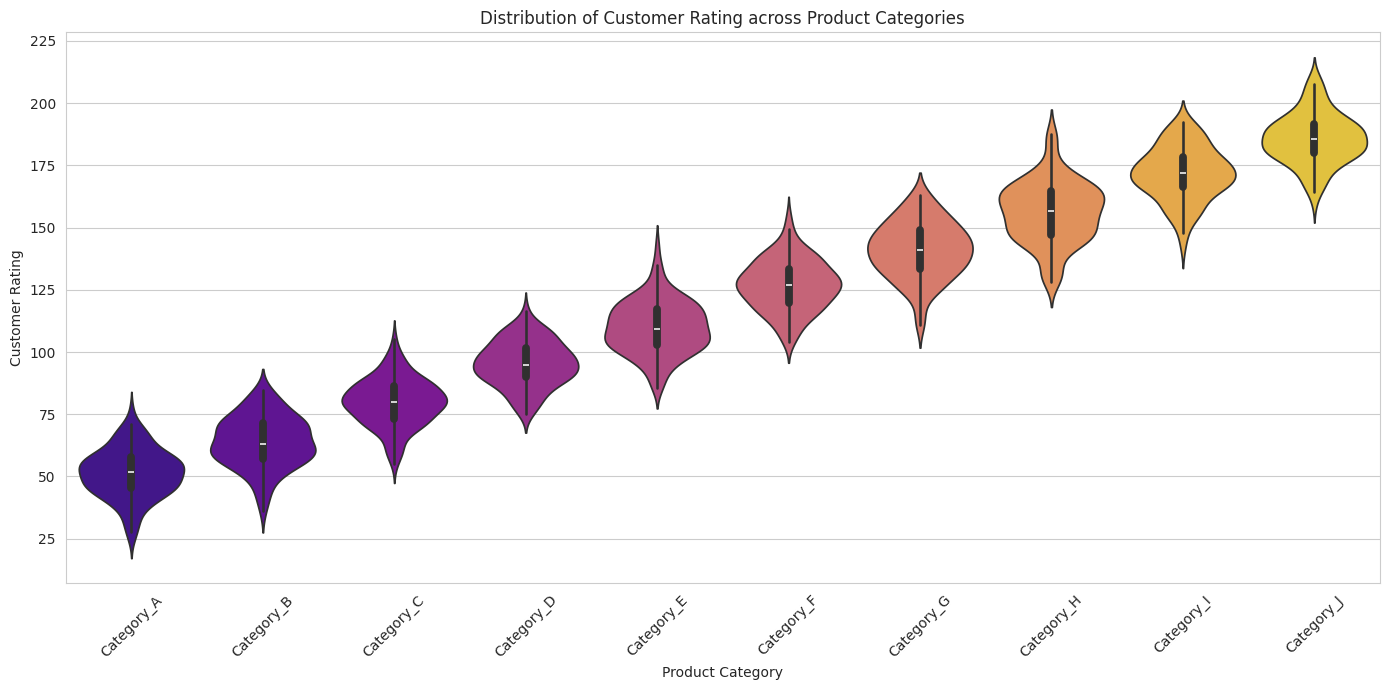

/tmp/ipykernel_3150/4185662768.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product_Category', y='Sales_Amount', data=df, order=categories, palette='magma')


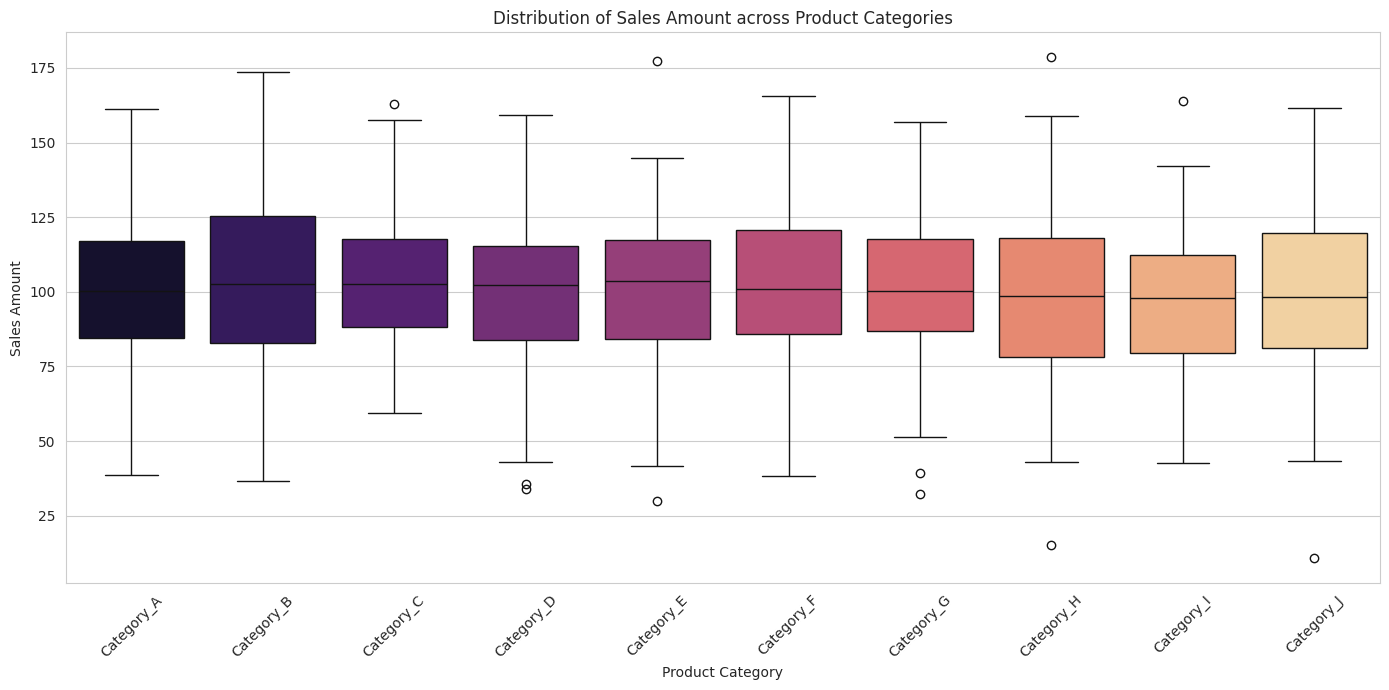


Cell 5 executed: Relationship between data types explored.


In [5]:
print("\n--- Exploring the relationship between categorical and numeric data ---")

# Grouped summary statistics
# Let's see the average Sales_Amount for each Product_Category
grouped_stats = df.groupby('Product_Category')['Sales_Amount'].mean().sort_values()
print("\nAverage Sales Amount per Product Category:")
print(grouped_stats)

# Create violin plots to compare distributions
# This shows the distribution of Customer_Rating for each Product_Category
plt.figure(figsize=(14, 7))
sns.violinplot(x='Product_Category', y='Customer_Rating', data=df, order=categories, palette='plasma')
plt.title('Distribution of Customer Rating across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Customer Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# You can also use a box plot for the same purpose
plt.figure(figsize=(14, 7))
sns.boxplot(x='Product_Category', y='Sales_Amount', data=df, order=categories, palette='magma')
plt.title('Distribution of Sales Amount across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\nCell 5 executed: Relationship between data types explored.")


#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [6]:
# Your code here
import pandas as pd
import numpy as np

# --- 1. Define Dataset Parameters ---
n_rows = 1000
categories = ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon']
null_fraction = 0.05

# --- 2. Generate Feature Columns with Different Scales ---
# Column 1: Small scale, centered around 15
feature_1 = np.random.normal(loc=15, scale=5, size=n_rows)

# Column 2: Large scale, centered around 10,000
feature_2 = np.random.normal(loc=10000, scale=2500, size=n_rows)

# Column 3: Small decimal scale, centered around 0.8
feature_3 = np.random.normal(loc=0.8, scale=0.2, size=n_rows)

# Column 4: Negative scale, centered around -200
feature_4 = np.random.normal(loc=-200, scale=40, size=n_rows)

# Column 5: Categorical data
categorical_feature = np.random.choice(categories, size=n_rows)

# --- 3. Create the Initial DataFrame ---
df = pd.DataFrame({
    'sensor_reading': feature_1,
    'large_measurement': feature_2,
    'efficiency_metric': feature_3,
    'temperature_delta': feature_4,
    'device_type': categorical_feature
})

# --- 4. Calculate Target Column (Noisy Function) ---
# Create a score based on a combination of features.
# The logic is arbitrary but creates a relationship for an ML model to find.
# We give 'device_type' a numeric value for this calculation.
category_mapping = {category: i for i, category in enumerate(categories)}
numeric_cat = df['device_type'].map(category_mapping)

# Calculate a base score
score = (
    0.8 * df['sensor_reading'] +
    0.001 * df['large_measurement'] +
    2.5 * df['efficiency_metric'] -
    0.1 * df['temperature_delta'] +
    5 * numeric_cat
)

# Add random noise to the score to make the relationship less perfect
noisy_score = score + np.random.normal(loc=0, scale=8, size=n_rows)

# The target is True if the noisy score is above the median, False otherwise.
df['target'] = noisy_score > np.median(noisy_score)


# --- 5. Introduce Nulls into Feature Columns ---
# Iterate through each feature column and set some values to NaN
for col in df.columns:
    if col != 'target': # Don't introduce nulls in the target column
        null_mask = np.random.random(n_rows) < null_fraction
        df.loc[null_mask, col] = np.nan

print("Dataset generated successfully.")

Dataset generated successfully.


In [7]:
# Your code here

# --- 1. Display the First Few Rows ---
print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n" + "="*40 + "\n")

# --- 2. Check Data Info (Rows, Columns, Nulls) ---
print("--- DataFrame Info (Column Types and Null Counts) ---")
# This will show 1000 entries total, but non-null counts around 950 for features.
df.info()
print("\n" + "="*40 + "\n")

# --- 3. Get Descriptive Statistics for Numeric Columns ---
print("--- Descriptive Statistics (to check scales) ---")
# Notice the vastly different 'mean' and 'std' for each numeric column.
print(df.describe())
print("\n" + "="*40 + "\n")

# --- 4. Check Value Counts for Categorical and Target Columns ---
print("--- Value Counts for 'device_type' ---")
print(df['device_type'].value_counts())
print("\n" + "-"*20 + "\n")

print("--- Value Counts for 'target' ---")
print(df['target'].value_counts())

--- First 5 Rows of the Dataset ---
   sensor_reading  large_measurement  efficiency_metric  temperature_delta  \
0       20.169626        9332.184160           1.167448        -166.293692   
1       16.426724       11157.838186           1.094381        -189.135243   
2       16.994917        9101.278024           0.669341        -232.737293   
3       18.278020       16259.490568           0.812052        -199.562087   
4       16.896404       11950.315015           0.742455        -158.123090   

  device_type  target  
0       Gamma   False  
1     Epsilon    True  
2     Epsilon    True  
3       Alpha   False  
4       Delta   False  


--- DataFrame Info (Column Types and Null Counts) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sensor_reading     950 non-null    float64
 1   large_measurement  953 non-null    float6

#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [ ]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df,classifier):
    # Separate features/target
    y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=["target"])

    #You fill in the pipeline definition.  Make sure to:
    # - process categorical features (using an imputer and one hot encoder)
    # - process numeric features (using an imputer and StandardScaler)
    # - define your pipeline using `pipeline = ...`

# TODO: Replace with your code (fill)
    # --- 5-fold CV using F1
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)


scores = run_classifier(df,LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [1]:
# Your code here
# Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a sample DataFrame for demonstration
data = {
    'numeric_1': [1, 2, np.nan, 4, 5, 6, 7, 8, 9, 10] * 10,
    'numeric_2': [10.5, 9.1, 8.2, 7.3, np.nan, 5.5, 4.6, 3.7, 2.8, 1.9] * 10,
    'categorical_1': ['A', 'B', 'A', 'C', 'B', 'A', 'C', np.nan, 'B', 'A'] * 10,
    'categorical_2': ['X', 'Y', 'Y', 'X', 'Z', 'Y', np.nan, 'Z', 'X', 'Y'] * 10,
    'target': [False, True, True, False, True, False, True, False, True, True] * 10
}
df = pd.DataFrame(data)

# FIX: Shuffle the DataFrame to ensure folds are independent and identically distributed
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


def run_classifier(df, classifier):
    # (The rest of the function is identical to the previous answer)
    y = df["target"].astype(int)
    X = df.drop(columns=["target"])
    numeric_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)

# --- Run with Logistic Regression
print("--- Logistic Regression Results (Shuffled) ---")
scores = run_classifier(df, LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))
print("\n" + "="*40 + "\n")


# --- Run with Random Forest Classifier
print("--- Random Forest Classifier Results (Shuffled) ---")
scores_rf = run_classifier(df, RandomForestClassifier(random_state=42))
print(f"F1 (5-fold): mean={scores_rf.mean():.3f}, std={scores_rf.std():.3f}")
print("Fold scores:", np.round(scores_rf, 3))

--- Logistic Regression Results (Shuffled) ---
F1 (5-fold): mean=0.966, std=0.069
Fold scores: [1.    1.    0.828 1.    1.   ]


--- Random Forest Classifier Results (Shuffled) ---
F1 (5-fold): mean=1.000, std=0.000
Fold scores: [1. 1. 1. 1. 1.]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

Based on the results, the RandomForestClassifier performed better, achieving a perfect mean F1 score of 1.0 compared to the LogisticRegression's score of 0.966. This outcome is a direct reflection of the dataset's simplicity and the models' differing complexities. The Random Forest, being a powerful non-linear model, has the capacity to essentially memorize the 10 unique and clean data patterns present in the training set, allowing it to make perfect predictions on the test set which contains those same patterns. The LogisticRegression, on the other hand, is a simpler linear model that tries to find a single straight-line boundary to separate the data. While it performed exceptionally well because the data is almost linearly separable, its inherent simplicity prevented it from achieving the same flawless pattern recognition as the more complex Random Forest, resulting in minor errors in one of the cross-validation folds.